In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import LeaveOneOutEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crop_data = pd.read_csv("crop_production.csv")
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
"""fIND OUT ALL UNIQUE CATEGORIES IN DATA"""
for col in crop_data:
    unique_col = crop_data[col].unique().tolist()  # Convert to a list if needed
    print(f"Unique {col} = {unique_col}\n")

Unique State_Name = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

Unique District_Name = ['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS', 'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA', 'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM', 'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW', 'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG', 'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY', 'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP', 'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST 

Unique Area = [1254.0, 2.0, 102.0, 176.0, 720.0, 18168.0, 36.0, 1.0, 5.0, 40.0, 83.0, 719.0, 18190.0, 46.0, 11.0, 189.2, 1258.0, 213.0, 63.0, 18240.0, 413.0, 47.3, 52.0, 1261.0, 266.0, 75.5, 717.0, 18284.74, 60.0, 4.2, 52.94, 1264.7, 66.42, 85.0, 683.5, 18394.7, 118.0, 2.09, 795.67, 22.0, 41.0, 450.0, 13876.57, 17.0, 10.0, 896.0, 198.0, 22.16, 14358.0, 3.0, 6.0, 0.2, 18.0, 52.03, 2.5, 3.5, 13.4, 944.0, 23.0, 1000.5, 12.0, 7.0, 3.84, 1.5, 593.0, 14560.0, 69.0, 3100.0, 668.0, 10779.0, 1531.0, 80.0, 6992.0, 352.0, 133.0, 141.0, 78.0, 160.0, 418.0, 9718.0, 81.0, 7015.0, 344.0, 100.0, 6854.3, 1160.0, 957.57, 175.0, 40.5, 3575.0, 235.72, 98.66, 35.62, 71.3, 30.0, 255.0, 68.0, 6791.0, 73.33, 1296.0, 294.5, 168.0, 84.5, 254.0, 110.0, 4.75, 86.7, 1168.6, 2.9, 109.0, 1059.5, 657.0, 3668.0, 186.5, 10695.8, 3105.0, 1524.0, 487.0, 7060.0, 239.0, 85.1, 455.0, 10509.37, 3118.0, 1530.0, 497.0, 116.5, 7110.0, 340.0, 406.0, 82.09, 268.0, 10681.98, 3160.67, 1912.1, 570.0, 7156.7, 410.0, 89.3, 145.26, 868

In [4]:
"""Imputation with mean values"""
# replace infinite values with NaN,
field = ["Crop_Year", "Area", "Production"]
for i in crop_data:
   if i in field:
      crop_data[i]= crop_data[i].replace([np.inf, -np.inf], np.NaN)
      # replace NaN with mean
      crop_mean = crop_data[i].mean()
      crop_data[i] = crop_data[i].fillna(crop_mean)


crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
"""print crop data columns to show size of data"""

for i in crop_data.columns:
    print("column name :",i)
    print("No. of column :",len(crop_data[i].unique()))
    print(crop_data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

In [6]:
print(crop_data['Crop_Year'].unique())

"""The data has been collected from 1997 to 2015"""


[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]


'The data has been collected from 1997 to 2015'

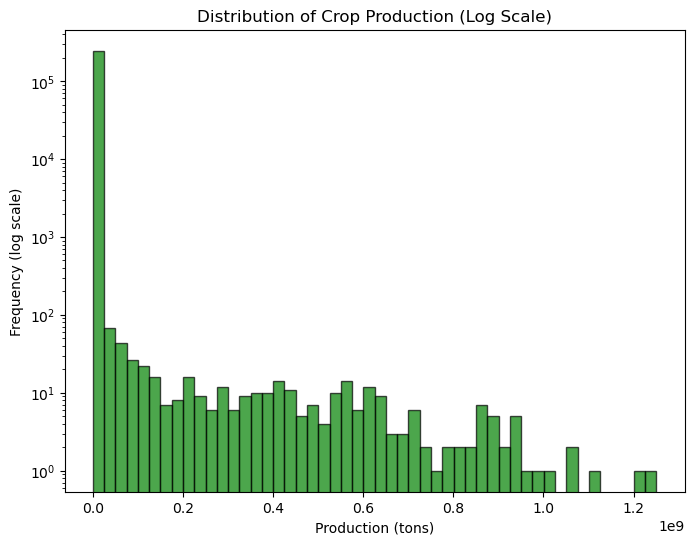

In [7]:

import matplotlib.pyplot as plt

"""
This histogram shows the distribution of crop production values.
- The x-axis represents Production (in tons).
- The y-axis represents Frequency, but on a logarithmic scale.
- Since production values vary widely, the log scale helps spread out the data.
- Higher bars indicate more frequent production values in that range.
- If a bar is around 10³ on the y-axis, it means many values are around 1,000 tons.
- The log scale allows us to see both small and large values more clearly.
"""

plt.figure(figsize=(8, 6))

plt.hist(crop_data['Production'], bins=50, color='green', alpha=0.7, edgecolor='black')

plt.yscale('log')  # Set Y-axis to log scale for better visualization

plt.title('Distribution of Crop Production (Log Scale)')
plt.xlabel('Production (tons)')
plt.ylabel('Frequency (log scale)')

plt.show()





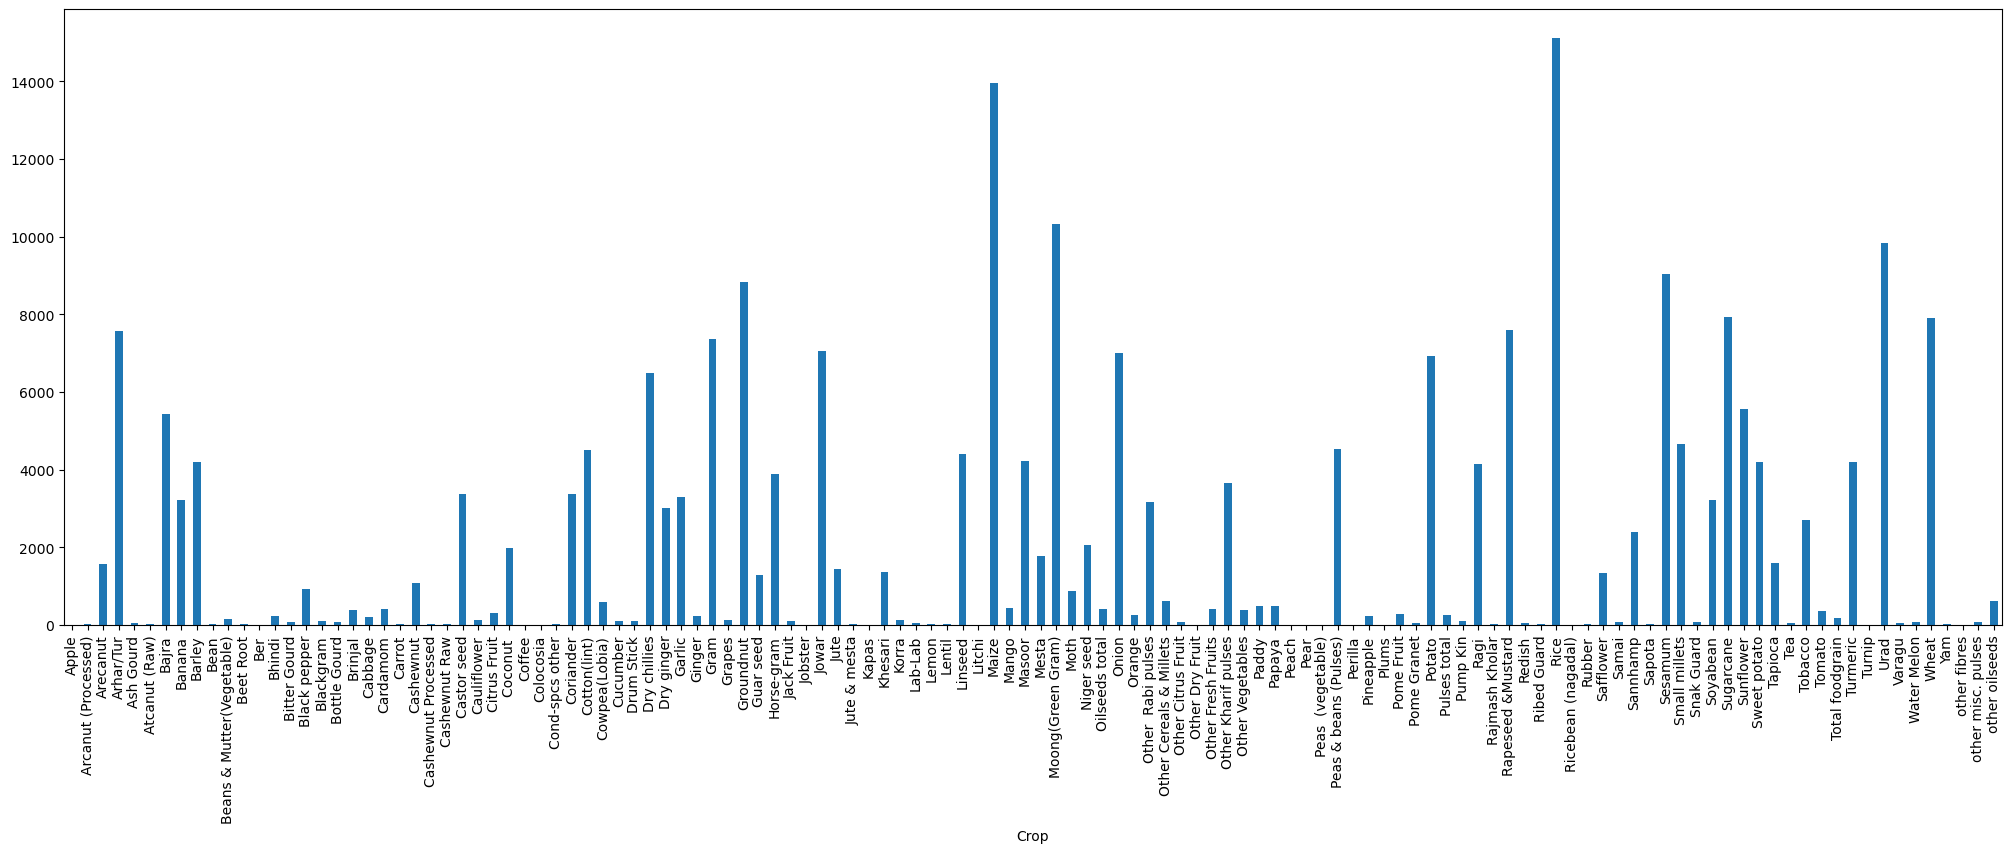

'This bar chart shows that from 1997 to 2015, Rice production is the highest'

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,8))
plt.tick_params(labelsize=10)
crop_data.groupby("Crop")["Production"].agg("count").plot.bar()
plt.show()
"""This bar chart shows that from 1997 to 2015, Rice production is the highest"""

In [9]:
"""Remove outlier that will skew the data set and not representative of the trend to see remarkable increase in model accuracy"""

# Ensure no outliers before training
import numpy as np

# Identify numerical columns
numerical_cols = ['Area', 'Crop_Year', 'Production']

# Compute IQR
Q1 = crop_data[numerical_cols].quantile(0.25)
Q3 = crop_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original dataset: {crop_data.shape}")

# Remove outliers
crop_data = crop_data[~((crop_data[numerical_cols] < lower_bound) | (crop_data[numerical_cols] > upper_bound)).any(axis=1)]

print(f"Cleaned dataset: {crop_data.shape}")

Original dataset: (246091, 7)
Cleaned dataset: (191392, 7)


In [10]:
"""Split into train and test data and use target encoding for categorical columns in the training data only"""


from sklearn.preprocessing import StandardScaler
# Important numerical columns
# Important numerical columns
important_cols = ['Area', 'Crop_Year']  # Exclude 'Production' since it's the target variable

# Categorical columns for target encoding
categorical_cols = ["State_Name", "District_Name", "Season", "Crop"]

# Define features (X) and target variable (y)
X = crop_data.drop(columns=['Production'])
y = crop_data['Production']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply log transformation to target variable
y_train_log = np.log1p(y_train)  # log(1 + y_train)
y_test_log = np.log1p(y_test)    # log(1 + y_test)

# Apply log transformation to Area (helps with skewed data)
X_train = X_train.copy()
X_test = X_test.copy()
X_test_unlogged = X_test
X_train_unlogged = X_train
X_train['Area'] = np.log1p(X_train['Area'])
X_test['Area'] = np.log1p(X_test['Area'])

# Convert X_train and X_test into copies for safe manipulation
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Apply target encoding on training data
target_encodings = {}

for col in categorical_cols:
    # Compute mean target value per category (only in training data)
    target_encodings[col] = X_train_copy[[col]].merge(y_train_log, left_index=True, right_index=True).groupby(col)[y_train_log.name].mean()
    
    # Replace categorical values with target-encoded values
    X_train_copy[col] = X_train_copy[col].map(target_encodings[col])
    X_test_copy[col] = X_test_copy[col].map(target_encodings[col])  # Use the same mapping

# Fill NaN values in the test set (for unseen categories)
X_test_copy[categorical_cols] = X_test_copy[categorical_cols].fillna(X_train_copy[categorical_cols].mean())

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

# Convert back to DataFrame
X_train_norm = pd.DataFrame(X_train_scaled, columns=X_train_copy.columns)
X_test_norm = pd.DataFrame(X_test_scaled, columns=X_test_copy.columns)


# Print sample results
print(f'X_train_norm:\n\n{X_train_norm.head()}\n\n')
print(f'X_test_norm:\n\n{X_test_norm.head()}\n\n')
print(f'y_train_log:\n\n{y_train_log.head()}\n\n')
print(f'y_test_log:\n\n{y_test_log.head()}\n\n')


X_train_norm:

   State_Name  District_Name  Crop_Year    Season      Crop      Area
0    0.443876      -0.588612   0.669305 -0.498080  1.599524 -0.580691
1   -1.354102      -1.158613  -0.547020 -0.782200  0.553555 -0.400364
2   -0.675506      -0.395963  -1.155183  1.109436 -0.646185  0.235238
3   -0.251209      -0.946182   0.263863 -0.498080  0.552416  0.445494
4    0.443876      -1.299274  -1.763345  1.109436 -0.302604  1.005816


X_test_norm:

   State_Name  District_Name  Crop_Year    Season      Crop      Area
0    0.443876       0.711235  -0.547020 -0.498080 -0.241024 -1.000466
1   -0.251209      -0.241344  -1.155183  1.109436  0.912938 -0.285326
2    1.252983       0.507608  -0.749741  1.109436 -0.814102  0.245722
3   -1.844314      -1.509430   0.872025 -0.498080 -0.494175  0.680532
4   -0.513646       0.829130   0.263863  1.109436  1.599524  0.431842


y_train_log:

80627     6.013715
49194     8.399760
155400    4.976734
223707    6.255750
97111     6.959399
Name: Production, 

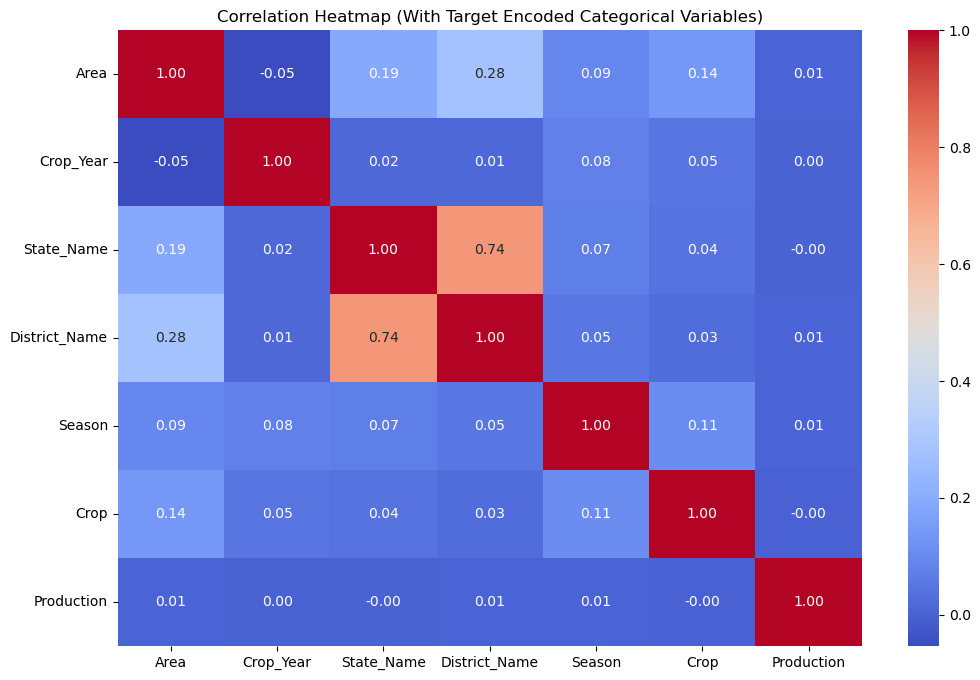

'Heat Map shows low correlation between the variables including the target variable(Production)'

In [11]:
"""Plot correlation heat map"""

import seaborn as sns

# Combine X_train and y_train for correlation computation
train_with_target = X_train_norm.copy()  # Make a copy of X_train
train_with_target['Production'] = y_train_log  # Add the target variable back

# Select numerical + encoded categorical columns + target variable
selected_cols = important_cols + categorical_cols + ['Production']

# Compute correlation matrix
corr = train_with_target[selected_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (With Target Encoded Categorical Variables)')
plt.show()


"""Heat Map shows low correlation between the variables including the target variable(Production)"""

In [12]:
""" Reset index for train and test data """

X_train_norm = X_train_norm.reset_index(drop=True)
X_test_norm = X_test_norm.reset_index(drop=True)
y_train_log = y_train_log.reset_index(drop=True)
y_test_log = y_test_log.reset_index(drop=True)

print(f'X_train_norm:\n\n {X_train_norm.head()}\n\n')
print(f'X_test_norm:\n\n {X_test_norm.head()}\n\n')
print(f'y_train_log:\n\n {y_train_log.head()}\n\n')
print(f'y_test_log:\n\n {y_test_log.head()}')

X_train_norm:

    State_Name  District_Name  Crop_Year    Season      Crop      Area
0    0.443876      -0.588612   0.669305 -0.498080  1.599524 -0.580691
1   -1.354102      -1.158613  -0.547020 -0.782200  0.553555 -0.400364
2   -0.675506      -0.395963  -1.155183  1.109436 -0.646185  0.235238
3   -0.251209      -0.946182   0.263863 -0.498080  0.552416  0.445494
4    0.443876      -1.299274  -1.763345  1.109436 -0.302604  1.005816


X_test_norm:

    State_Name  District_Name  Crop_Year    Season      Crop      Area
0    0.443876       0.711235  -0.547020 -0.498080 -0.241024 -1.000466
1   -0.251209      -0.241344  -1.155183  1.109436  0.912938 -0.285326
2    1.252983       0.507608  -0.749741  1.109436 -0.814102  0.245722
3   -1.844314      -1.509430   0.872025 -0.498080 -0.494175  0.680532
4   -0.513646       0.829130   0.263863  1.109436  1.599524  0.431842


y_train_log:

 0    6.013715
1    8.399760
2    4.976734
3    6.255750
4    6.959399
Name: Production, dtype: float64


y_tes

In [13]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lin_model = SGDRegressor(max_iter=5000, eta0=0.0000005, learning_rate='adaptive', random_state=42)
lin_model.fit(X_train_norm, y_train_log)

# Predict in log scale
lin_pred_test_log = lin_model.predict(X_test_norm)

# Convert predictions back to the original scale
lin_pred_test = np.expm1(lin_pred_test_log)

# Evaluate in the original scale
lin_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), lin_pred_test))
lin_r2 = r2_score(np.expm1(y_test_log), lin_pred_test)

print(f"Linear Regression Testing RMSE: {lin_rmse:.2f}")
print(f"Linear Regression Testing R²: {lin_r2:.2f}")
print(y_test.mean()) 









Linear Regression Testing RMSE: 2414.14
Linear Regression Testing R²: 0.41
1643.2284223725803


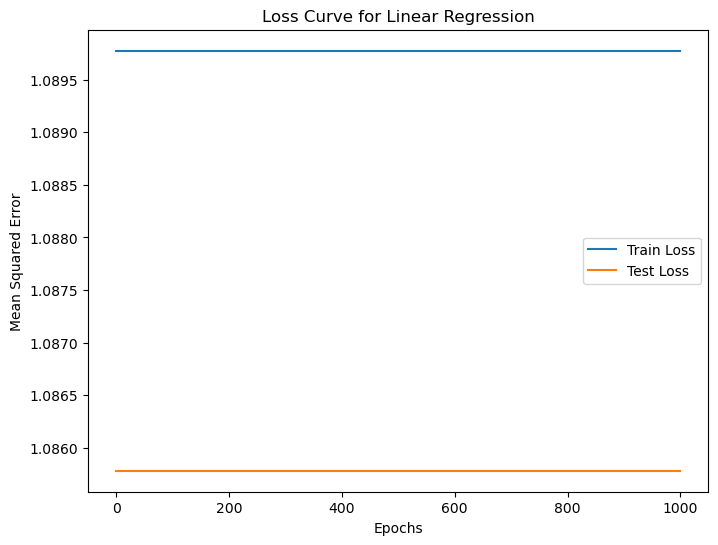

In [13]:
"""Plot Loss curve for Linear regression Model"""

train_loss = []
test_loss = []

# Train the model and track loss
for epoch in range(1000):
    lin_model.fit(X_train_norm, y_train_log)
    
    # Predict on training and test data
    y_pred_train = lin_model.predict(X_train_norm)
    y_pred_test = lin_model.predict(X_test_norm)
    
    # Calculate MSE for training and test data
    train_loss.append(mean_squared_error(y_train_log, y_pred_train))
    test_loss.append(mean_squared_error(y_test_log, y_pred_test))

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss Curve for Linear Regression')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Loss Curve Interpretation

#### Train Loss (Horizontal Straight Line at the Top)
The training loss remains constant and high across all epochs, indicating that the model is **not learning** from the training data. This suggests potential issues such as:
- The **model architecture** is too simple to capture the underlying patterns in the data leading to poor model performance.

#### Test Loss (Flat Straight Line at the Bottom)
The test loss remains constant and low across all epochs, which is unusual given the high training loss. This could indicate:
- The model is **not generalizing well**, and the low test loss might be coincidental or misleading.

### Recommendations
1. **Increase model complexity**: Add more features or use a more sophisticated algorithm (e.g., Random Forests or Gradient Boosting).


In [14]:
"""Random Forest Model Attempt 1"""
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on log-transformed target
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_copy, y_train_log)  # Use log-transformed y_train

# Predict in log scale
rf_pred_log = rf_model.predict(X_test_copy)

# Convert predictions back to the original scale
rf_pred_original = np.expm1(rf_pred_log)

# Calculate RMSE and R² in the original scale
rf_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), rf_pred_original))
rf_r2 = r2_score(np.expm1(y_test_log), rf_pred_original)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")




Random Forest RMSE: 1155.61
Random Forest R² Score: 0.87


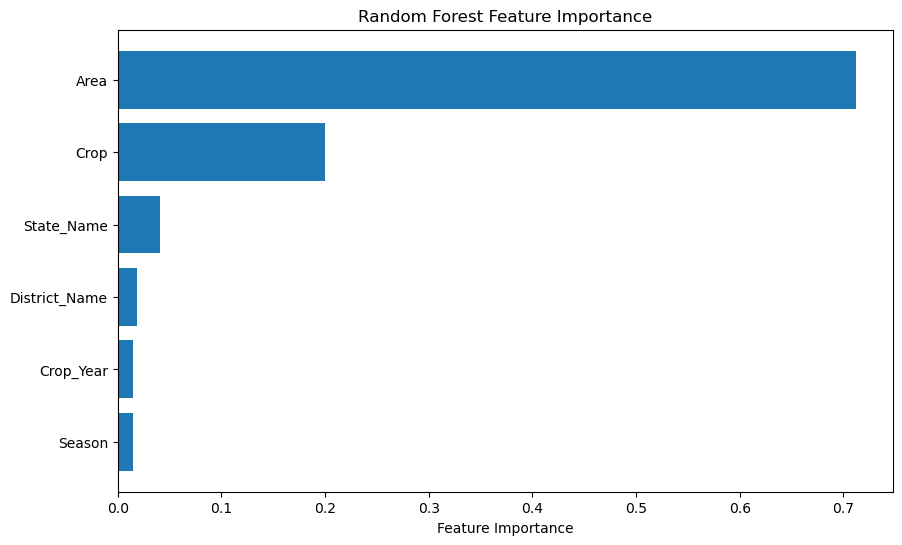

In [15]:
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(X_train_copy.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [16]:
"""Drop Low-Importance Features to improve random forest training"""

# Set threshold (e.g., 0.01)
low_importance_features = X_train_copy.columns[importances < 0.01]

# Drop them
X_train_rf = X_train_copy.drop(columns=low_importance_features)
X_test_rf = X_test_copy.drop(columns=low_importance_features)

In [17]:
"""Random Forest Model Attempt 2"""
# Train Random Forest on log-transformed target
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_log)  # Using log-transformed y_train

# Predict in log scale
rf_pred_log = rf_model.predict(X_test_rf)

# Convert predictions back to the original scale
rf_pred_original = np.expm1(rf_pred_log)

# Calculate RMSE and R² in the original scale
rf_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), rf_pred_original))  # Use y_test_log for evaluation
rf_r2 = r2_score(np.expm1(y_test_log), rf_pred_original)  # Use y_test_log for evaluation

print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest RMSE: 1155.61


In [18]:
print(f"Random Forest R² Score: {rf_r2:.2f}")
print(f'Target variable mean: {y_test.mean()}') 

Random Forest R² Score: 0.87
Target variable mean: 1643.2284223725803


In [19]:
"""Decision Trees Model"""


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_copy, y_train_log)

# Get the best parameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_dt_model = grid_search.best_estimator_

# Predict on the test set with the best model
best_dt_pred_log = best_dt_model.predict(X_test_copy)
best_dt_pred_original = np.expm1(best_dt_pred_log)

# Evaluate the best model
best_dt_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), best_dt_pred_original))
best_dt_r2 = r2_score(np.expm1(y_test_log), best_dt_pred_original)

# Print the results
print(f"Best Decision Tree RMSE: {best_dt_rmse:.2f}")
print(f"Best Decision Tree R² Score: {best_dt_r2:.2f}")



Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree RMSE: 1328.65
Best Decision Tree R² Score: 0.82


In [20]:
"""Comparison results of the three models showing code used to judge"""

# Evaluate Linear Regression
lin_pred_test_log = lin_model.predict(X_test_norm)
lin_pred_test = np.expm1(lin_pred_test_log)
lin_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), lin_pred_test))
lin_r2 = r2_score(np.expm1(y_test_log), lin_pred_test)

# Evaluate Random Forest
rf_pred_log = rf_model.predict(X_test_rf)
rf_pred_original = np.expm1(rf_pred_log)
rf_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), rf_pred_original))
rf_r2 = r2_score(np.expm1(y_test_log), rf_pred_original)

# Evaluate Decision Tree
best_dt_pred_log = best_dt_model.predict(X_test_copy)
best_dt_pred_original = np.expm1(best_dt_pred_log)
best_dt_rmse = np.sqrt(mean_squared_error(np.expm1(y_test_log), best_dt_pred_original))
best_dt_r2 = r2_score(np.expm1(y_test_log), best_dt_pred_original)

print(f"Linear Regression - RMSE: {lin_rmse:.2f}, R²: {lin_r2:.2f}")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"Decision Tree - RMSE: {best_dt_rmse:.2f}, R²: {best_dt_r2:.2f}")


Linear Regression - RMSE: 2414.14, R²: 0.41
Random Forest - RMSE: 1155.61, R²: 0.87
Decision Tree - RMSE: 1328.65, R²: 0.82


In [21]:
"""Based on the Loss Metric (mse)"""
# Evaluate Linear Regression using MSE (Loss Metric)
lin_mse = mean_squared_error(np.expm1(y_test_log), lin_pred_test)
print(f"Linear Regression - MSE: {lin_mse:.2f}")

# Evaluate Random Forest using MSE (Loss Metric)
rf_mse = mean_squared_error(np.expm1(y_test_log), rf_pred_original)
print(f"Random Forest - MSE: {rf_mse:.2f}")

# Evaluate Decision Tree using MSE (Loss Metric)
best_dt_mse = mean_squared_error(np.expm1(y_test_log), best_dt_pred_original)
print(f"Decision Tree - MSE: {best_dt_mse:.2f}")

Linear Regression - MSE: 5828080.58
Random Forest - MSE: 1335439.49
Decision Tree - MSE: 1765306.87


In [22]:
"""To Save the best performing Model"""

import joblib

# Determine the best model
models = {
    'Linear Regression': (lin_model, lin_rmse),
    'Random Forest': (rf_model, rf_rmse),
    'Decision Tree': (best_dt_model, best_dt_rmse)
}

# Find the model with the lowest RMSE
best_model_name = min(models, key=lambda k: models[k][1])
best_model = models[best_model_name][0]

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"Saved {best_model_name} as 'best_model.pkl'")

Saved Random Forest as 'best_model.pkl'


In [24]:
"""Prediction with one data point in the test train data"""

# Load the saved model
best_model = joblib.load('best_model.pkl')

# Select one row from the test data
sample_input = X_test_rf.iloc[0:1]  # First row of the test data

# Make a prediction
prediction_log = best_model.predict(sample_input)
prediction = np.expm1(prediction_log)  # Convert back to original scale

print(f"Predicted Production: {prediction[0]:.2f} tons")

Predicted Production: 6.42 tons


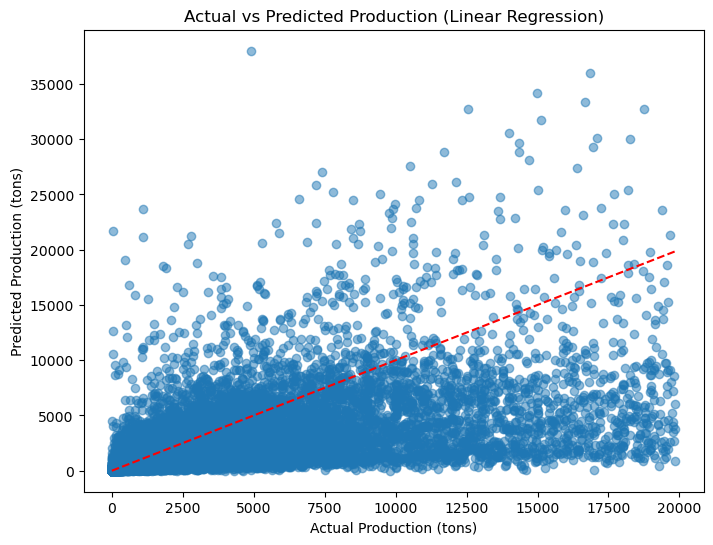

'As you can see using Linear Regression Here is not a good idea for this data set as it does not capture the variance and well and non-linear relaionships '

In [ ]:
"""Scatter plot for Linear Regression"""
# Predict on the entire test set
lin_pred_test_log = lin_model.predict(X_test_norm)
lin_pred_test = np.expm1(lin_pred_test_log)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test_log), lin_pred_test, alpha=0.5)
plt.plot([min(np.expm1(y_test_log)), max(np.expm1(y_test_log))], [min(np.expm1(y_test_log)), max(np.expm1(y_test_log))], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Production (Linear Regression)')
plt.xlabel('Actual Production (tons)')
plt.ylabel('Predicted Production (tons)')
plt.show()




"""As you can see using Linear Regression Here is not a good idea for this data set as it does not capture the variance and well and non-linear relaionships """

**As you can see using Linear Regression Here is not a good idea for this data set as it does not capture the variance and well and non-linear relationships**

In [25]:
"""Save target encoding structure and low_importance feaature criteria"""


joblib.dump(target_encodings, 'target_encodings.pkl')
joblib.dump(low_importance_features, 'low_importance_features.pkl')


['low_importance_features.pkl']

In [26]:
"""Function to make a prediction using a the best-performing model"""

def predict_crop_production(input_data, model_path='best_model.pkl',
                            target_encodings_path='target_encodings.pkl',
                            low_importance_features_path='low_importance_features.pkl'):
    """
    Predicts crop production using the trained Random Forest model.
    
    Parameters:
    - input_data (dict): A dictionary containing the input features:
        - 'Area': Area under cultivation
        - 'Crop_Year': Year of cultivation
        - 'State_Name': Name of the state
        - 'District_Name': Name of the district
        - 'Season': Growing season
        - 'Crop': Type of crop
    - model_path (str): Path to the saved model
    - target_encodings_path (str): Path to the saved target encodings
    - low_importance_features_path (str): Path to the low-importance features
    
    Returns:
    - float: Predicted crop production in tons
    """
    import numpy as np
    import pandas as pd
    import joblib
    
    # Load all saved objects
    model = joblib.load(model_path)
    target_encodings = joblib.load(target_encodings_path)
    low_importance_features = joblib.load(low_importance_features_path)
    
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Step 1: Apply log transform to Area (same as in training)
    input_df['Area'] = np.log1p(input_df['Area'])
    
    # Step 2: Apply target encoding to categorical columns
    categorical_cols = ["State_Name", "District_Name", "Season", "Crop"]
    
    # Create a copy for safe manipulation
    input_df_copy = input_df.copy()
    
    for col in categorical_cols:
        if col in input_df_copy.columns:
            # Map the categorical values using the same encoding as in training
            # target_encodings[col] is a Series with index=category and values=encoding
            input_df_copy[col] = input_df_copy[col].map(lambda x: target_encodings[col].get(x) if x in target_encodings[col].index else None)
    
    # Handle unseen categories (NaN values) using the mean of training encodings
    for col in categorical_cols:
        if col in input_df_copy.columns and input_df_copy[col].isnull().any():
            # Calculate mean of the target encodings for this column
            mean_encoding = target_encodings[col].mean()
            input_df_copy[col] = input_df_copy[col].fillna(mean_encoding)
    
    # Step 3: Ensure all required columns exist
    required_features = model.feature_names_in_
    
    # Add any missing columns that the model expects
    for col in required_features:
        if col not in input_df_copy.columns:
            input_df_copy[col] = 0  # Use a default value
    
    # Step 4: Drop low importance features
    if low_importance_features is not None:
        for col in low_importance_features:
            if col in input_df_copy.columns:
                input_df_copy = input_df_copy.drop(columns=[col])
    
    # Step 5: Make sure columns are in the exact same order as training
    input_df_copy = input_df_copy[required_features]
    
    # Step 6: Make prediction
    prediction_log = model.predict(input_df_copy)
    
    # Step 7: Convert back from log scale to original scale
    prediction = np.expm1(prediction_log[0])
    
    return prediction


# Debug function - compares your predictions with a reference prediction
def debug_prediction(input_data, reference_row=None):
    """
    Debug your predictions by comparing with a reference prediction
    
    Parameters:
    - input_data: The same data you want to predict with
    - reference_row: A row from X_test_rf to compare with (optional)


    """
            
    print("\nYour processed input data before function call:")
    print(input_data)
        
    
    # Make prediction
    prediction = predict_crop_production(input_data)
    
    print(f"Predicted Production: {prediction:.2f} tons")
    
    # If reference data is provided, compare the inputs
    if reference_row is not None:
        print("\nReference data from X_test_rf:")
        print(reference_row)
        
        # Process the input data through the same steps to compare
        input_df = pd.DataFrame([input_data])
        input_df['Area'] = np.log1p(input_df['Area'])
        
        print("\nYour processed input data after :")
        print(input_df)
        
        print("\nKeys to check:")
        # Load objects to examine
        model = joblib.load('best_model.pkl')
        print("Model expected features:", model.feature_names_in_)
        
    return prediction

In [27]:
"""Test function with a single input"""
first_row = X_test_unlogged.iloc[0]


# Convert the first row into the expected input format
input_data = {
    'Area': first_row['Area'],
    'Crop_Year': first_row['Crop_Year'],
    'State_Name': first_row['State_Name'],
    'District_Name': first_row['District_Name'],
    'Season': first_row['Season'],
    'Crop': first_row['Crop']
}

# Call the function to make a prediction
predicted_production = predict_crop_production(input_data)

# Print the result
print(f"Predicted Production: {predicted_production:.2f} tons")

Predicted Production: 1.39 tons
